<a href="https://colab.research.google.com/github/aryelmedeiros/mineracao-de-dados/blob/main/Minera%C3%A7%C3%A3o_de_Dados_Atividade_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atvidade 1 - Mineração de Dados


Essa atividade consiste na exploração do conjunto de dados de reservas em hoteis com o objetivo de prever se uma reserva será **cancelada** ou **não cancelada**

## Importando o Dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ahsan81/hotel-reservations-classification-dataset")

print("Path to dataset files:", path)

100%|██████████| 480k/480k [00:00<00:00, 55.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ahsan81/hotel-reservations-classification-dataset/versions/1


In [2]:
!ls /root/.cache/kagglehub/datasets/ahsan81/hotel-reservations-classification-dataset/versions/1

'Hotel Reservations.csv'


In [3]:
import pandas as pd

df = pd.read_csv("/root/.cache/kagglehub/datasets/ahsan81/hotel-reservations-classification-dataset/versions/1/Hotel Reservations.csv")

## Verificações iniciais sobre o Dataset

In [4]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


## Identificando valores faltantes

In [7]:
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [8]:
df.head(10)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [9]:
df["type_of_meal_plan"].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [10]:
df["type_of_meal_plan"].value_counts()

,count
type_of_meal_plan,
Meal Plan 1,27835
Not Selected,5130
Meal Plan 2,3305
Meal Plan 3,5


In [11]:
df["room_type_reserved"].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [12]:
df["room_type_reserved"].value_counts()

,count
room_type_reserved,
Room_Type 1,28130
Room_Type 4,6057
Room_Type 6,966
Room_Type 2,692
Room_Type 5,265
Room_Type 7,158
Room_Type 3,7


In [13]:
df["arrival_year"].value_counts()

,count
arrival_year,
2018,29761
2017,6514


In [14]:
df["market_segment_type"].value_counts()

,count
market_segment_type,
Online,23214
Offline,10528
Corporate,2017
Complementary,391
Aviation,125


In [18]:
df["booking_status"].value_counts()

,count
booking_status,
Not_Canceled,24390
Canceled,11885


A analise da variavel alvo do modelo aponta que o dataset apresenta um leve desbalanceamento

## Codificação de Variaveis Categoricas utlizando o Hot One Enconding

Pelos atributos categoricos do dataset não possuírem uma hierarquia clara, Ex (bom, medio, ruim) o Label Enconding não se mostra a melhor opção.

In [16]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

## Definição dos Conjuntos de Treino e Teste

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

categorical_features = [
    'market_segment_type',
    'room_type_reserved',
    'type_of_meal_plan'
]

binary_features = [
    'repeated_guest'
    ]

numeric_features = [
    'arrival_year',
    'no_of_adults',
    'no_of_children',
    'no_of_weekend_nights',
    'no_of_week_nights',
    'required_car_parking_space',
    'lead_time',
    'arrival_year',
    'arrival_month',
    'arrival_date',
    'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled',
    'avg_price_per_room',
    'no_of_special_requests',
]

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bin', 'passthrough', binary_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])


## Definindo Conjunto de Treino e Teste

O metodo HoldOut será utlizizado para a definição dos conjuntos de treino e teste do Decision Tree Classifier, ou seja, os dados dos 2 conjuntos não se misturam, sendo 70% para Treino e 30% para teste

In [20]:
from sklearn.model_selection import train_test_split

# 1. Separar X e y
X = df.drop(columns=['booking_status','Booking_ID'])
y = df['booking_status']

# 2. Separar treino e teste #HoldOUT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


# Treino e Teste (HOLD OUT)

In [25]:
# 3. Criar pipeline
pipeline.fit(X_train, y_train)

# 4. Avaliar
y_pred = pipeline.predict(X_test)

# Avaliando o Modelo

In [26]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Canceled       0.81      0.80      0.81      3566
Not_Canceled       0.90      0.91      0.91      7317

    accuracy                           0.87     10883
   macro avg       0.86      0.86      0.86     10883
weighted avg       0.87      0.87      0.87     10883



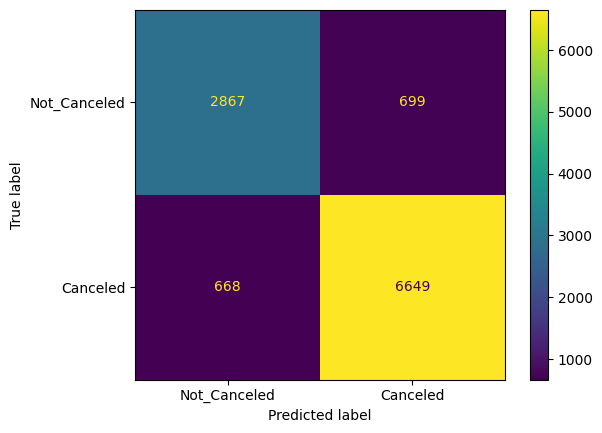

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predição
y_pred = pipeline.predict(X_test)

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plot
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Not_Canceled', 'Canceled']
)

disp.plot()
plt.show()


## Validação Cruzada (CV = 10)

In [30]:
y = y.map({'Not_Canceled': 0, 'Canceled': 1})

In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    pipeline,
    X,
    y,
    cv=10,
    scoring='f1'
)

print(scores)


[0.81848185 0.81905558 0.80688497 0.80067002 0.80751566 0.80541455
 0.8069286  0.81087866 0.79881657 0.80321625]


In [33]:
print(scores.mean())

0.8077862704816671


#Conclusão


Quando comparado a metrica F1-Score para ambas as tecnicas utilizadas (HoldOut e Cross-Validation) temos um valor muito aproximado. Ou seja, isso é um grande indicativo de que o modelo que construimos é um modelo estável, sem overfitting dos dados